# Intro to Computer Vision

## OpenCV

OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products.

It has C++, Python, Java and MATLAB interfaces and supports Windows, Linux, Android and Mac OS. OpenCV leans mostly towards real-time vision applications and takes advantage of MMX and SSE instructions when available. A full-featured CUDA and OpenCL interfaces are being actively developed right now.

You can install OpenCV using this link:
https://pypi.org/project/opencv-python/

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

**sourse link:**<br>https://docs.opencv.org/3.1.0/dc/d2e/tutorial_py_image_display.html


### Reading, Writing, and Showing Images
#### Reading

Using the imread function read fireball.jpg image.


In [3]:
# Load an color image in grayscale
img = cv2.imread('mountains.jpg')

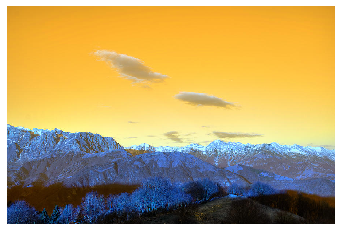

In [4]:
plt.imshow(img,cmap="gray")
plt.axis('off');

What is the type of the image? 

In [5]:
img.dtype

dtype('uint8')

dimensions? 

In [6]:
img.shape

(598, 900, 3)


#### Channels, Image Formats, and using images as arrays

The shape of a color image is (height, width, colors <b>BGR</b>, not RGB as you might expect).  While it may seem strange that the height is first, it's because OpenCV treats images as "Rows" and "Columns" of an image. The "height" of an image is the number of rows!

You can see each pixel is represented by 3 values (uint8 means they are between 0 and 255)


Color images consist of "channels" - each color we can render is some combination of red, green, and blue (OR, in the case of a grayscale image, gray).

By default, color images are opened by OpenCV as BGR, meaning the values for a given pixel are ordered "blue, green, red".

Use the cv2.cvtColor function to change which color system our image is in. This will appear shortly.

**sourse link:**<br>https://realpython.com/python-opencv-color-spaces/

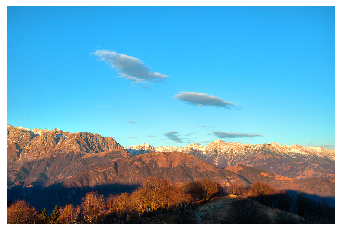

In [7]:
img_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr,cmap="gray")
plt.axis('off');

#### Showing the image

Matplotlib assumes images are in the RGB format. OpenCV assumes that images are in the BGR format. So, we'll convert colors before showing the image using matplotlib. Let's make a function to do this.

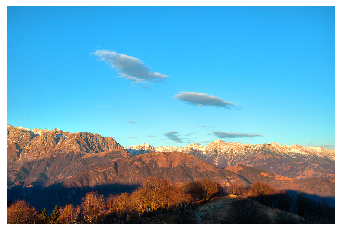

In [8]:
def bgr_to_rgb(image):
    
    blue = image[:,:,0]
    green = image[:,:,1]
    red = image[:,:,2]
    image_new = image.copy()
    image_new[:,:,0] = red
    image_new[:,:,1] = green
    image_new[:,:,2] = blue
    return image_new


plt.imshow(bgr_to_rgb(img),cmap="gray")
plt.axis('off');

### Manipulating images
#### Changing color spaces

OpenCV exposes several functions to work with images. Let's use the cvtColor function to convert the color image to gray. Grayscale images do not have a third dimension, instead, each pixel has a luminosity ("whiteness") value between 0 and 255.

Lets draw ourselves a grayscale kitty:

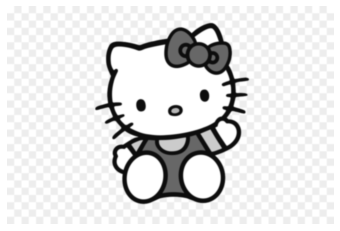

In [9]:
#gray = cv2.imread('hello_kitty.jpg',0)
hello_kitty = cv2.imread('hello_kitty.jpg')

gray = cv2.cvtColor(hello_kitty, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray", interpolation = 'bicubic')
plt.axis('off');

We also can manipulate it by doing anything we would to a normal array. Let's make an image that includes the gray kitty as the blue channel and red channels, and nothing in the green channels (this is NOT the same as excluding the green channel from the original image).

**sourse link:**<br>https://www.mathworks.com/matlabcentral/answers/91036-how-do-i-split-a-color-image-into-its-3-rgb-channels<br>https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html

In [10]:
gray.shape

(600, 900)

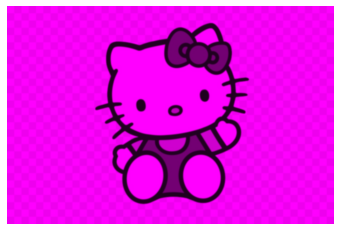

In [11]:
black = np.zeros((600,900,3)).astype(np.uint8)
black[:,:,0] = gray
black[:,:,1] = np.zeros((600,900))
black[:,:,2] = gray
plt.imshow(black,cmap="gray", interpolation = 'bicubic')
plt.axis('off');

#### Resizing images

We can also resize images using resize. This needs the output size. Note that these are image sizes, which are expressed as (width, height), NOT to be confused with their shape.

Make kitty's width x4 longer:

**sourse link:**<br>https://stackoverflow.com/questions/4195453/how-to-resize-an-image-with-opencv2-0-and-python2-6

Resized Dimensions :  (600, 3600, 3)


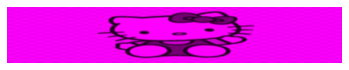

In [12]:
resized = cv2.resize(black, (0,0), fx=4, fy=1) 
print('Resized Dimensions : ',resized.shape)
 
plt.imshow(resized,cmap="gray", interpolation = 'bicubic')
plt.axis('off');

#### Writing an Image

The imwrite function can write out an image. Let's write out the image we just made, so we can use it later!


**sourse link:**<br>https://docs.opencv.org/3.1.0/dc/d2e/tutorial_py_image_display.html

In [13]:
cv2.imwrite('messi_resize.png',resized)

True

### Gamma Correction

Create a function that is called adjust_gamma that takes an image, and a gamma value. The function then return the image transformed according to the gamma value 


**sourse link:**<br>https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/

In [14]:
def adjust_gamma(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)   

Load dog.jpg image.
plot images eith following gamma values:
0.125
0.5
1
2
4
16

In [15]:
dog = cv2.imread('dog.jpg')


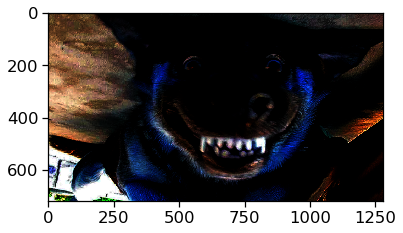

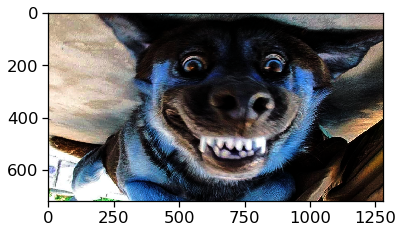

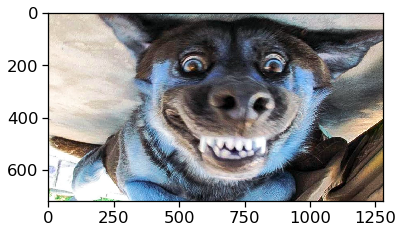

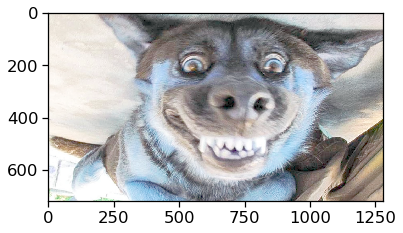

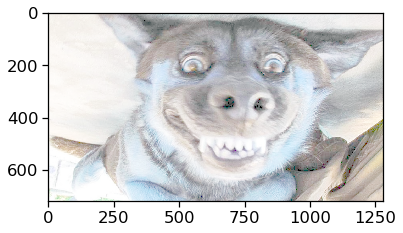

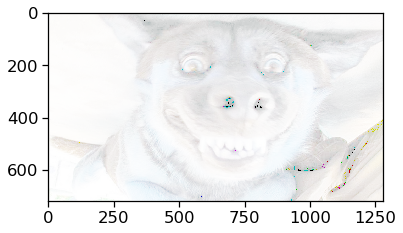

In [16]:
gamma_s =  [0.125, 0.5, 1, 2, 4, 16]

for gamma in gamma_s:
    adjust_dog = adjust_gamma(dog, gamma) 
    plt.imshow(adjust_dog)
    plt.show()

### Histogram Equalization

Read hist_1.jpg image and print it before histogram equalisation and one after<br>
Plot pixel value histograms as well

**sourse link:**<br>https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html

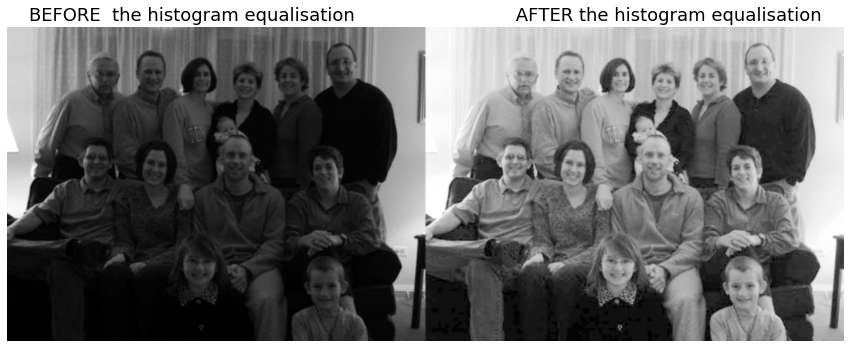

In [17]:
hist_1 = cv2.imread('hist_1.jpg',0)
equ = cv2.equalizeHist(hist_1)
res = np.hstack((hist_1,equ)) #stacking images side-by-side
plt.figure(figsize = (15,8));
plt.imshow(res,cmap="gray", interpolation = 'bicubic')
plt.title('BEFORE  the histogram equalisation                            \
AFTER the histogram equalisation')
plt.axis('off');

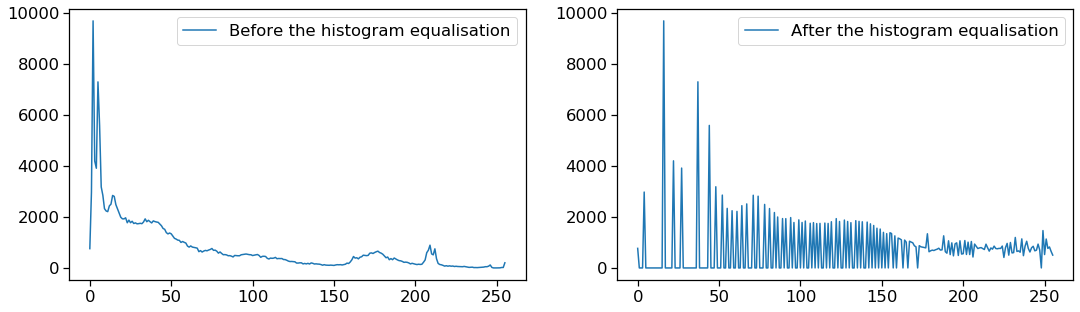

In [18]:
before = cv2.calcHist([hist_1],[0],None,[256],[0,256])
after = cv2.calcHist([equ],[0],None,[256],[0,256])

plt.figure(figsize = (18,5))
plt.subplot(121)
plt.plot(before, label =  "Before the histogram equalisation")
plt.legend(loc='best')

plt.subplot(122)
plt.plot(after, label = 'After the histogram equalisation')
plt.legend(loc='best');


Read hist_1.jpg image and print it before histogram equalisation using CLAHE method and one after
<br>
Plot pixel value histograms as well

**sourse link:**<br>https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html

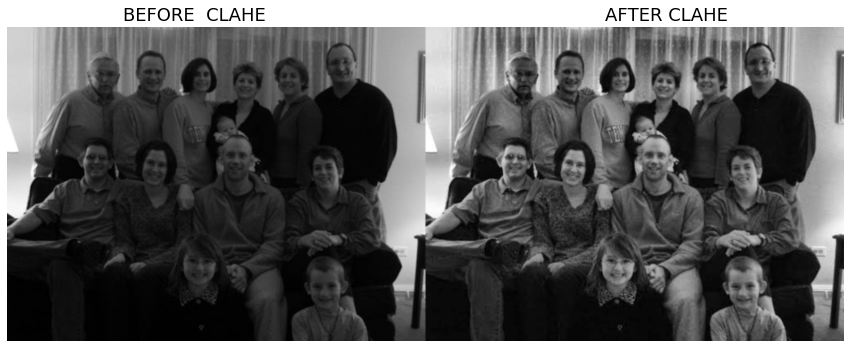

In [19]:
hist_2 = cv2.imread('hist_1.jpg',0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(hist_2)
res2 = np.hstack((hist_2,cl1)) #stacking images side-by-side
plt.figure(figsize = (15,8));
plt.imshow(res2,cmap="gray", interpolation = 'bicubic')
plt.title('BEFORE  CLAHE                                                           \
AFTER CLAHE')
plt.axis('off');

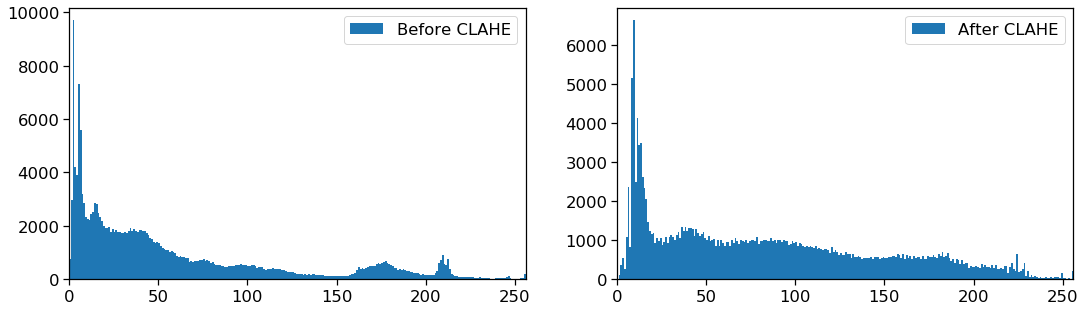

In [20]:
plt.figure(figsize = (18,5))
plt.subplot(121)
plt.hist(hist_2.ravel(),256,[0,256],label =  "Before CLAHE")

plt.xlim([0,256])
plt.legend(loc='best')

plt.subplot(122)
plt.hist(cl1.ravel(),256,[0,256],label = 'After CLAHE')
plt.xlim([0,256])
plt.legend(loc='best');

Discuss the difference between regular Histogram Equalization and CLAHE

**sourse link:**<br>https://en.wikipedia.org/wiki/Adaptive_histogram_equalization#:~:text=Contrast%20Limited%20AHE%20(CLAHE)%20is,slope%20of%20the%20transformation%20function.<br>The article  from 1989: https://pubmed.ncbi.nlm.nih.gov/2488161/

Clahe vs histogram equalization
Contrast Limited AHE (CLAHE) is a variant of adaptive histogram equalization in which the contrast amplification is limited, so as to reduce this problem of noise amplification. In CLAHE, the contrast amplification in the vicinity of a given pixel value is given by the slope of the transformation function.

#### Binary Thresholding

Use mountains.jpg, plot a gray image and an image after binary thresholding of 100


**sourse link:**<br>https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

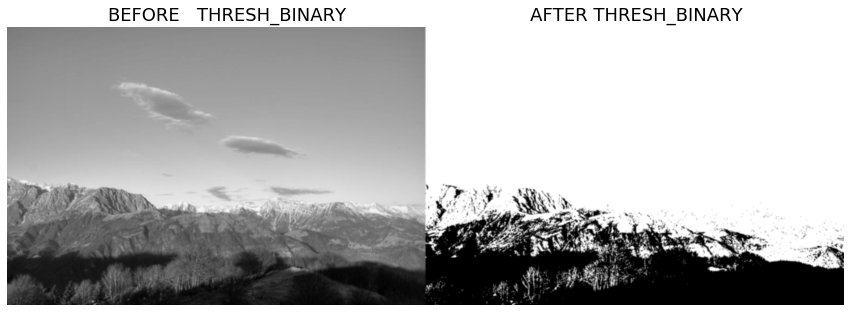

In [21]:
mountains = cv2.imread('mountains.jpg',0)
_,thresh1 = cv2.threshold(mountains,100,255,cv2.THRESH_BINARY)

res3 = np.hstack((mountains,thresh1)) #stacking images side-by-side
plt.figure(figsize = (15,8));
plt.imshow(res3,cmap="gray", interpolation = 'bicubic')
plt.title('BEFORE   THRESH_BINARY                                \
AFTER THRESH_BINARY')
plt.axis('off');